In [7]:
import numpy as np
np.set_printoptions(precision=3)
import transgraph as tg

In [8]:
M = np.array(((0.3,0.2,0),(0.5,0.7,0),(0.2,0.1,1)))
print(M)


[[ 0.3  0.2  0. ]
 [ 0.5  0.7  0. ]
 [ 0.2  0.1  1. ]]


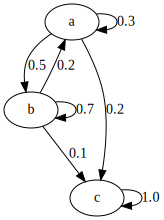

In [3]:
tg.transmat_to_graph(M,["a","b","c"],edge_labs="flows")

In [9]:
A = M[:-1,:-1]
print(A)


[[ 0.3  0.2]
 [ 0.5  0.7]]


In [5]:
B = M[-1,:-1]
print(B)


[ 0.2  0.1]


In [12]:
F = np.linalg.inv(np.eye(2)-A)
print(F)

[[ 2.727  1.818]
 [ 4.545  6.364]]


In [14]:
np.sum(F,axis=0)

array([ 7.273,  8.182])